<a href="https://colab.research.google.com/github/knazran/python-for-analytics/blob/master/Python_Analytics_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Python for Analytics Exercise!

As mentioned earlier, Python for Analytics is mostly done by utilising packages and methods other people have already created.

Here, we will learn how to use Pandas packages for our data wrangling and analysis, and the Matplotlib package for our visualisation needs.


To use any packages in Python, you need to `import` it first.

This is similar to checking out a reference book from the library and into our program so our programs know where to refer to.

When importing, you can also assign a name to the package using `as`. This makes typing easier. Rather than repeating `pandas` over and over, we type `pd` instead.

In [0]:
# Run this block

import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

### Simple Analytical Steps

For simple analytics, the steps are:


1.   Load Data
2.   Describe Data
3.   Slice and Manipulate Data
4.   Grouping and Aggregating Data
5.   Visualise Data

We will go through the common methods in pandas to achieve each of the steps here.

# Load Data

The most common data input in pandas is in CSV format. To properly leverage on the power of pandas, these CSVs will have to be loaded in a pandas `DataFrame`

To load csv into pandas `DataFrame`, use the `read_csv()` method.

For the purpose of the exercise, let's load the California housing data. Learn more here: https://developers.google.com/machine-learning/crash-course/california-housing-data-description

In [0]:
df_housing = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [0]:
df_housing

# Describe Data

Once data is loaded in a dataframe, the first order of business is to understand data, it's shapes and characteristics.



### Dataframe shape

To check the shape of the DataFrame table, use `.shape`

**Challenge Question**

Why `.shape` does not have a ()? Is `.shape` a method? a function? Or something else?

In [0]:
df_housing.shape

### Dataframe Column Names

To check the column names of the DataFrame use `.columns`


In [0]:
df_housing.columns

### Inspect Rows

To check the first 'n' rows of the DataFrame use `.head()` method

To check the last 'n', use `.tail()` instead


In [0]:
df_housing.head(10)

### Descriptive Statistics

Its good to run descriptive statistics on the data as a sanity check.

Use the `.describe()` method


In [0]:
df_housing.describe()

### Selecting and Zooming Into a Column

At times, we would want to look into a specific column in the data.

To access data in a column, we can use the square bracket notation on the dataframe, similar to access values in a dictionary

*Note: Recall that columns of data in a Dataframe are Series.*

In [0]:
# Access the median_house_value column
# Column name is a string! Do not forget that
df_housing['median_house_value']

### Unique values

From a column of data, we can check for unique values and the count of values

To find unique values in a Series, use the `.unique()` method

This is a one of the method to check for duplicates and ensure uniqueness

In [0]:
len(df_housing['total_rooms'].unique())

To get counts of values, use the `value_counts()` methods

In [0]:
df_housing['total_rooms'].value_counts()

### Missing Values

As sanity check as well, it is good to check for any missing data.

Missing data will commonly be read as 'NaN' by pandas. To find them, use the `isna()` method, followed by a `.sum()` to sum all the counts together.

In [0]:
df_housing.isna().sum()

# Slice and Manipulate Data

The next step after understanding the high-level characteristic of our data, we will then slice and manipulate data in order to find out interesting nuggets of insights.

### Slicing Data based on columns

To obtain a subset of columns from a dataframes, we can pass a list into the square bracket notation to access values

In [0]:
# Slicing dataframe based on a list of columns
targeted_columns = ['households', 'median_income', 'median_house_value']
df_housing[targeted_columns]

Alternatively (and more elegantly), use the `.filter()` method



In [0]:
df_housing.filter(targeted_columns)

### Slicing data based on rows

At times, we would want to inspect data based on a certain row such as 'Rows where Column A is less than 5 and Column B is True'

To do that, we pass a conditional into the square bracket notation

In [0]:
conditional = (df_housing['median_house_value'] > 100000)
df_housing[conditional]

In [0]:
# Same effect
df_housing[(df_housing['median_house_value'] > 100000)]

Multiple conditionals can be passed for more complex criterias.

However, it does not support `and` and `or`. Substitute `and` with `&`, `or` with `|`

In [0]:
df_housing[(df_housing['median_house_value'] > 100000) & (df_housing['households'] < 200)]

Alternatively (and again, more elegantly), use the `.query()` method

Note: `.query()` method is very sensitive to the string you are passing. 

In [0]:
df_housing.query("median_house_value > 100000")

In [0]:
# Multiple conditionals
df_housing.query("(median_house_value > 100000) & (households < 200)")

### Creating New Columns

To create a new column in a dataframe, it is similar to assigning a new key-value pair into a dictionary

In [0]:
df_housing['new_column'] = 0
df_housing

You can assign a list or a Pandas Series as values for the new columns

In [0]:
import random
list_of_random_values = [random.randint(0, 100) for x in range(0, df_housing.shape[0])] # Don't worry about this

df_housing['random_column'] = list_of_random_values
df_housing

You can also create columns from results created by other columns

In [0]:
df_housing['average_people_per_household'] = df_housing['population'] / df_housing['households']
df_housing

**A bit more advanced**

If you want your new column to be created from the results of a function, use `.apply()` method


In [0]:
import random

# Function that adds an input number and a random number together and return the sum
def addMagicNumber(number):
  return number + random.randint(0,500)

df_housing['household_with_randomNum'] = df_housing['households'].apply(addMagicNumber)
df_housing

Alternatively, you can also can use the `.assign()` method to create new columns.


In [0]:
df_housing = df_housing.assign(Test = 0, No = list_of_random_values)
df_housing

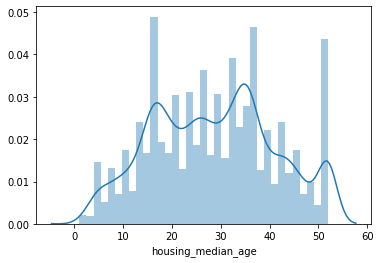

In [72]:
import seaborn as sns

sns.distplot(df_housing['housing_median_age'])

**Challenge Question**

How do you drop columns then?

# Grouping and Aggregating Data

pandas offers an 'SQL-like' style to group and aggregate data with `groupby()` method

For example, let's try finding the average population size and house_value for different income groups

In [88]:
income_labels = ['B40', 'M40', 'T20']
df_housing['income_group'] = pd.qcut(df_housing['median_income'], # Again, don't worry about this
                              q=[0, .4, .8, 1],
                              labels=income_labels)

df_grouped = df_housing.groupby(['income_group']).mean().filter(['population', 'median_house_value'])
df_grouped

,population,median_house_value
income_group,,
B40,1403.561471,137405.299412
M40,1446.940882,212430.683382
T20,1446.865000,336832.596176


Looking at the `groupby()` statement above, it consists of several components


1.   `.groupby()` function. This find which column it is 'pivoting' on
2.   `.mean()` which is one of the aggregation function you can use. You can also use `.count()`, `.median()` etc



Groupby with multiple columns is also possible. And it will pivot based on which column comes first.

In [75]:
house_labels = ['New', 'Old', 'Vintage']
df_housing['house_age_group'] = pd.qcut(df_housing['housing_median_age'], # Again, don't worry about this
                              q=[0, .2, .8, 1],
                              labels=house_labels)

# Groupby house age and then income group
df_housing.groupby(['house_age_group', 'income_group']).mean().filter(['population', 'median_house_value'])

population  median_house_value
house_age_group income_group                                 
New             B40           1687.517155       126231.970711
                M40           1961.577246       178717.490419
                T20           1994.239963       292715.196078
Old             B40           1437.698039       135059.857598
                M40           1373.995920       211187.831209
                T20           1288.840381       344374.667019
Vintage         B40           1089.722623       152435.811148
                M40            972.311258       263072.652318
                T20            789.528604       412302.018307

**Important**

A dataframe in 'grouped' formed is very hard to extend or do further manipulation and processing.

It is highly advisable to run `reset_index()` such that the dataframe is 'flat' again.

In [77]:
df_housing.groupby(['house_age_group', 'income_group']).mean().filter(['population', 'median_house_value']).reset_index()

,house_age_group,income_group,population,median_house_value
0,New,B40,1687.517155,126231.970711
1,New,M40,1961.577246,178717.490419
2,New,T20,1994.239963,292715.196078
3,Old,B40,1437.698039,135059.857598
4,Old,M40,1373.995920,211187.831209
5,Old,T20,1288.840381,344374.667019
6,Vintage,B40,1089.722623,152435.811148
7,Vintage,M40,972.311258,263072.652318
8,Vintage,T20,789.528604,412302.018307


# Visualise Data

As mentioned, we will be using matplotlib to visualise our data.

Two main concepts:


1.   `plt.figure()` - where we will draw our charts
2.   `plt.plot()` - how we will draw our charts



### Plot()

First, let's try plotting a simple chart via `plot()`

`plot()` method very simply accepts two parameters: 1) a list of values for the x-axis, 2) a list of values for the y-axis



In [0]:
# Don't worry about these
import numpy as np
x = np.arange(0, 10, 0.2)
y = np.sin(x)

plt.plot(x,y)

For dataframes, we can use the `data` parameter and just pass column names into `.plot()`


In [0]:
plt.plot(df_housing.index,'median_house_value', data=df_housing)

Even simpler, you can even use `.plot()` on a Pandas Series to automatically plot

In [0]:
df_housing['median_house_value'].plot()

To plot a bar chart, replace `.plot()` with `.bar()`

For Pandas Series, pass the `kind='bar'` parameter

In [0]:
plt.bar(df_grouped.index,'median_house_value',data=df_grouped)

In [0]:
df_grouped['median_house_value'].plot(kind='bar')

### Figure()

Now, to ensure our plots are well formatted, we utilise the `plt.figure()` method

This method is very dense and flexible and can be very complex.

For the sake of brevity, we are only going to go over: 1) Size of `figure()` , 2) Place a title into our figure

To manage the size of your chart, use the `figsize` parameter into `figure()`

In [0]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)

plt.figure(figsize=(12,8))
plt.plot(x,y)

To place a title into our chart, we use the `title()` method.

Underneath the hood, it is actually modifying the figure underneath

In [0]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)

plt.figure(figsize=(12,8))
plt.title("Test Chart")
plt.plot(x,y)